### Start by importing all necessary packages

In [1]:
import warnings
import numpy as np                                   # type: ignore
import seaborn as sns                                # type: ignore
import pandas as pd                                  # type: ignore
import matplotlib.pyplot as plt                      # type: ignore
import statsmodels.api as sm                         # type: ignore
from statsmodels.formula.api import ols              # type: ignore
from statsmodels.formula.api import logit            # type: ignore
from scipy.stats import norm                         # type: ignore
from sklearn.model_selection import train_test_split # type: ignore
from sklearn.metrics import ConfusionMatrixDisplay   # type: ignore
from sklearn.metrics import confusion_matrix         # type: ignore
from sklearn.metrics import accuracy_score           # type: ignore
from pandas.errors import SettingWithCopyWarning     # type: ignore
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

### Read the loans.csv file into a pandas dataframe called "df"

In [2]:
# Read the file loan.csv into a Pandas dataframe object, df. 
df = pd.read_csv("files/loan.csv")

### Extract the two columns you will be focusing on "default" and "fico_score" 

In [3]:
#Extract everything besided "default" and "fico_score" from the dataframe
df = df.drop(["installment"], axis=1)
df = df.drop(["log_income"], axis=1)
df = df.drop(["rev_balance"], axis=1)
df = df.drop(["inquiries"], axis=1)
df = df.drop(["records"], axis=1)

### Examine the data

In [4]:
df.head(6)

,default,fico_score
0,0,737
1,0,707
2,0,682
3,0,712
4,0,667
5,0,727


In [5]:
df.tail(6)

,default,fico_score
9510,1,662
9511,1,672
9512,1,722
9513,1,687
9514,1,692
9515,1,732


### use df.loc[] to grab all the columns where default = 1/ there was a default. Assign this to "default_df"

In [6]:
# Use df.loc[] to extract all rows where a loan defaulted.
# Set the resulting dataset to default_df to be displayed
default_df = df.loc[df['default'] == 1]
print('\nResult dataframe :\n', default_df)


Result dataframe :
       default  fico_score
6           1         667
7           1         722
57          1         682
65          1         687
73          1         677
...       ...         ...
9511        1         672
9512        1         722
9513        1         687
9514        1         692
9515        1         732

[1521 rows x 2 columns]


### Use df.loc[] to grab all rows where a loan did not default and assign the output to no_default_df. 

In [7]:
#Use df.loc[] to extract all rows where a loan did not default.
# Set the resulting dataset to no_default_df to be displayed
no_default_df = df.loc[df['default'] == 0]
print('\nResult dataframe :\n', no_default_df)


Result dataframe :
       default  fico_score
0           0         737
1           0         707
2           0         682
3           0         712
4           0         667
...       ...         ...
9499        0         722
9500        0         717
9502        0         687
9505        0         687
9506        0         667

[7995 rows x 2 columns]


### Examine the resulting dataframes 

In [8]:
no_default_df.describe()

,default,fico_score
count,7995.0,7995.000000
mean,0.0,713.307067
std,0.0,38.209948
min,0.0,612.000000
25%,0.0,682.000000
50%,0.0,707.000000
75%,0.0,742.000000
max,0.0,827.000000


In [9]:
default_df.describe()

,default,fico_score
count,1521.0,1521.000000
mean,1.0,697.884287
std,0.0,33.764233
min,1.0,617.000000
25%,1.0,672.000000
50%,1.0,692.000000
75%,1.0,717.000000
max,1.0,822.000000


### Fill in the code to display a scatter plot of fico_score vs defaults. Set alpha =0.1 and s=200

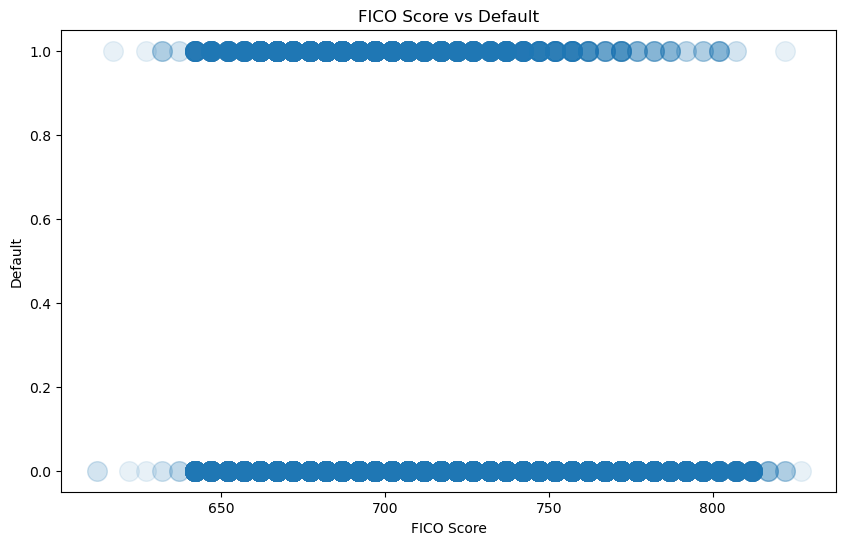

In [10]:
# Fill in the code to display a scatter plot of fico_score vs defaults. Set alpha =0.1 and s=200
# This will make the points transparent and larger
plt.figure(figsize=(10, 6))
plot = plt.scatter(df['fico_score'], df['default'], alpha=0.1, s=200)
plt.xlabel('FICO Score')
plt.ylabel('Default')
plt.title('FICO Score vs Default')
plt.show()
points = plot.get_offsets()

### Split the dataframe into train and test sets called df_train and df_test

In [11]:
# Data split into 70% train and 30% test. 
# The dataframes should be called df_train and df_test
df_train, df_test = train_test_split(df, test_size=0.3)

### Examine the training set

In [12]:
df_train.describe()

,default,fico_score
count,6661.000000,6661.000000
mean,0.162738,710.634589
std,0.369154,38.017513
min,0.000000,612.000000
25%,0.000000,682.000000
50%,0.000000,707.000000
75%,0.000000,737.000000
max,1.000000,827.000000


### Create a formula and your modle based on training data

In [13]:
# build formula,  target (depedent variable) ~ features (indepedent variables)
# build model, fit the formula to the training data using a logistic algorithim (logit). 
# Set the output to "est"
formula = "default ~ fico_score"
est = logit(formula, df_train).fit()
# print the results of the model (est).
# Examine; Pseudo R-squared, p values, coefficients 
print(est.summary())

Optimization terminated successfully.
         Current function value: 0.432493
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                 6661
Model:                          Logit   Df Residuals:                     6659
Method:                           MLE   Df Model:                            1
Date:                Mon, 17 Mar 2025   Pseudo R-squ.:                 0.02632
Time:                        18:21:40   Log-Likelihood:                -2880.8
converged:                       True   LL-Null:                       -2958.7
Covariance Type:            nonrobust   LLR p-value:                 9.713e-36
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5953      0.686      9.617      0.000       5.251       7.939
fico_score    -0.0117      0.

### Use your model to make predictions based on the test set

In [14]:
# Use your model to create a predicted probability of default from the df_test dataframe 
# Assign a new column "predicted_probability" to the predicted output
df_test['predicted_probability'] = est.predict(df_test)
df_test.head(6)

,default,fico_score,predicted_probability
1327,1,712,0.152160
2942,0,737,0.118194
3325,0,752,0.101125
956,0,732,0.124415
8141,0,642,0.288956
2148,0,767,0.086281


### Next, create a new column called "will default" that observes the predicted probability and flags a loan as a potential to default or not. Experiment with the predicted probability threshold to optimise the model. 

In [15]:
# Create a new column called "will_default". Play around with the predicted probability threshold. 
# A good starting threshold for a 1 flag is 25%
#If yes assign will_default to 1, otherwise to 0
df_test['will_default'] = np.where(df_test['predicted_probability'] > 0.25, 1, 0)
print(df_test)

      default  fico_score  predicted_probability  will_default
1327        1         712               0.152160             0
2942        0         737               0.118194             0
3325        0         752               0.101125             0
956         0         732               0.124415             0
8141        0         642               0.288956             1
...       ...         ...                    ...           ...
9442        1         697               0.176154             0
6095        0         722               0.137701             0
5222        0         682               0.203026             0
7840        1         652               0.265570             1
5729        0         742               0.112244             0

[2855 rows x 4 columns]


### Create a confusion matrix so you can observe your model's performance on the test data. It should be examining predicted vs actual default values (will_default vs default). 

In [16]:
# Create a confusion matrix displaying actual vs predicted values. 
# Assign the output to "matrix"
matrix = confusion_matrix(df_test['default'], df_test['will_default'])
print(matrix)

[[2321   97]
 [ 394   43]]


### Execute the following cells to view a heatmap of the confusion matrix and accuracy of your model. Use these to answer the follow-up questions for the assignment.

<Axes: >

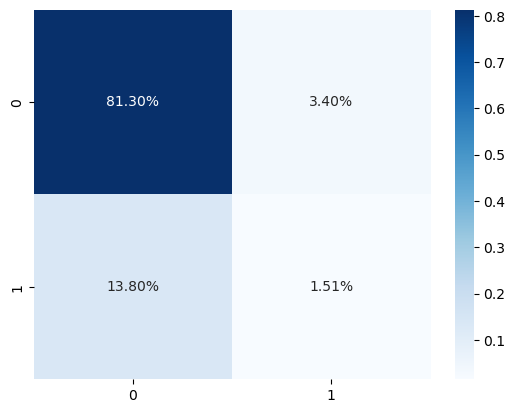

In [17]:
sns.heatmap(matrix/np.sum(matrix), annot=True, 
            fmt='.2%', cmap='Blues')

<Axes: >

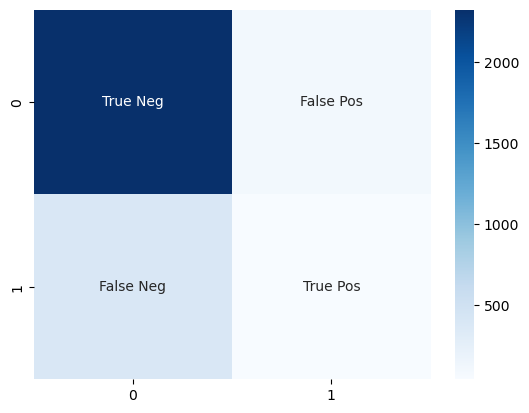

In [18]:
labels = ["True Neg","False Pos","False Neg","True Pos"]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(matrix, annot=labels, fmt="", cmap='Blues')

### Finally, observe the accuracy of the model. 

In [19]:
# Print the accuracy of the model
print('Accuracy:'+str(accuracy_score(df_test['default'], df_test['will_default'])))

Accuracy:0.8280210157618214
